# modules

Ansible modules are categorized into various groups based on their functionality.

**System modules**:
* These are actions to be performed at a system level, such as:
    * modifying the users and groups on the system,
    * modifying IP tables,
    * firewall configurations on the system,
    * working with logical volume groups,
    * mounting operations,
    * or working with services (like starting, stopping, or restarting services in a system).
* Commonly used modules are:
    * `User`
    * `Group`
    * `Hostnames`
    * `Iptables`
    * `Lvg` (Logical Volume Groups)
    * `Lvol` (Logical Volume)
    * `Make`
    * `Mount`
    * `Ping`
    * `Timezone`
    * `Systemmd`
    * `Service`

**Commands modules**:
* These are used to execute commands or scripts on a host.
* Commonly used modules are:
    * `Command` - Executes simple commands on a host.
    * `Expect` - Allow an interactive execution by responding to prompts.
    * `Raw`
    * `Script` - Run a script on the host
    * `Shell`

**File modules**:
* It helps to work with files.
* Commonly used modules are:
    * `Acl` - Use the **ACL** module to set and retrieve **ACL** information on files.
    * `Archive` - Use the **archive** module to compress files.
    * `Copy`
    * `File`
    * `Find` - Use **find**, **lineinfile**, and **replace** modules to modify the contents of an existing file.
    * `Lineinfile` - Use **find**, **lineinfile**, and **replace** modules to modify the contents of an existing file.
    * `Replace` - Use **find**, **lineinfile**, and **replace** modules to modify the contents of an existing file.
    * `Stat`
    * `Template`
    * `Unarchive` - Use the **un-archive** modules to unpack files.

**Database modules**:
* It helps in working with databases, such as MongoDB, MySQL, MSSQL, or PostgreSQL, to add or remove databases or modify database configurations.
* Commonly used modules are:
    * `Mongodb`
    * `Mssql`
    * `Mysql`
    * `Postgresql`
    * `Proxysql`
    * `vertica`

**Cloud module**:
* It has a vast collection of modules for various cloud providers, like Amazon, Azure, Docker, Google, OpenStack, and VMware, being just a few of them.
* There are a number of modules available for each of these that allow you to perform various tasks, such as:
    * creating and destroying instances,
    * performing configuration changes in networking and security,
    * managing containers, data centers & clusters,
    * virtual networking, VSAN, and a lot more.
* Commonly used modules are:
    * `Amazon`
    * `Atomic`
    * `Azure`
    * `Centrylink`
    * `Cloudscale`
    * `Cloudstack`
    * `Digital Ocean`
    * `Docker`
    * `Google`
    * `Lincode`
    * `Openstack`
    * `Rackspace`
    * `Smartos`
    * `Softlayer`
    * `VMware`


**Windows modules**:
* It helps you use Ansible in a Windows environment.
* Commonly used modules are:
    * `Win_copy` - to copy files.
    * `Win_command` - to execute a command on a Windows machine.
    * `Win_domain`
    * `Win_file`
    * `Win_iis_website` - to create an IIS website.
    * `Win_msg`
    * `Win_msi` - install software using MSI installer.
    * `Win_package`
    * `Win_ping`
    * `Win_path`
    * `Win_robocopy`
    * `Win_regedit` - to make changes to the registry.
    * `Win_shell`
    * `Win_service` - to manage services in Windows.
    * `Win_user` - to manage users in Windows.
    * etc.


These are just a few modules in a few categories.

There are a lot more, and a comprehensive list can be found at **`docs.ansible.com`**, along with detailed instructions on each of them.

**Let's look at a few of these modules in detail, to understand how you can use them and how to read the documentation page.**

# `command` module

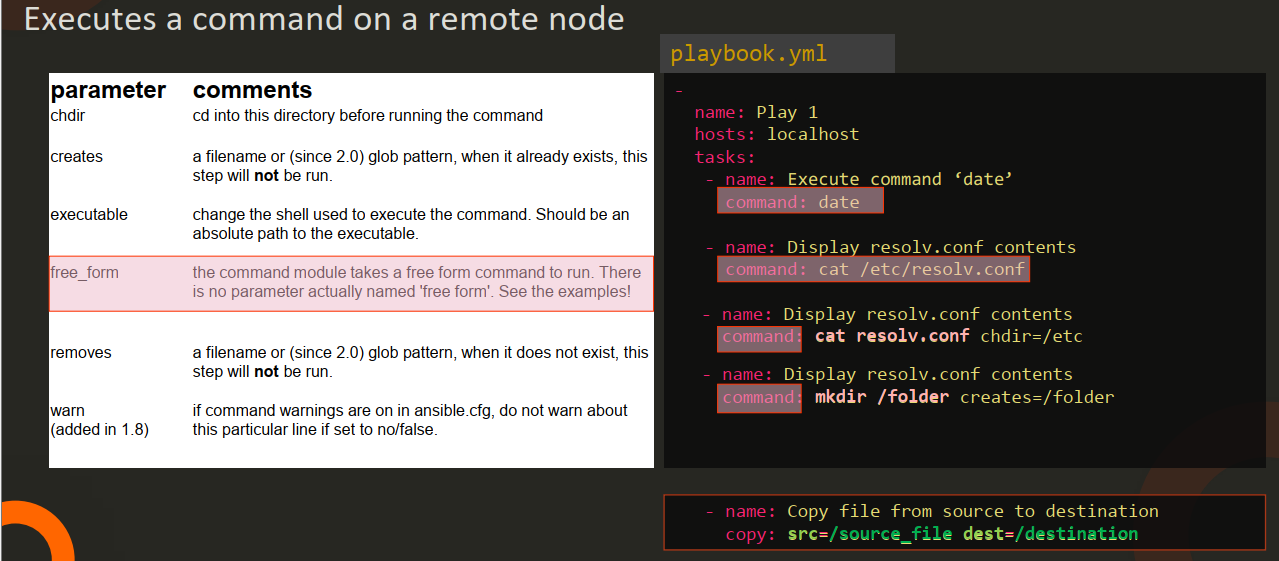

The `command` module is used to execute a command on a remote node.
* The **parameters** of the `command` module, as listed in the documentation page, are shown here.
* Shown is a sample Ansible playbook using the `command` module.

As you can see, to use the module, you simply create a key-value pair of the **module name** and the **parameter**, which is the `command` in this case.
* In this case, we are instructing Ansible to run the `date` command on the host, followed by executing the `cat /etc/resolv.conf` command, to list the contents of the file.
* In case you needed to change the directory before executing a command.
    * You can set the `chdir` (**change directory**) parameter to `/etc`.
    * This will ensure that Ansible changes the directory to `/etc` before executing the command.
    * This is how a parameter and value are passed to this `command` module.
* The `creates` parameter is used to perform a check before the command is run.
    * For example, the `mkdir` command to create the folder will only run if the folder does not exist.
* The remaining parameters are self-explanatory, so we will skip them, except the `free_form` parameter.

The `free_form` parameter indicates that this module takes a **free-form** command to run.
* You will not be able to pass the `free_form` parameter, with the name command, like how we just used, `chdir` or `creates` options.
* Our command input, such as `cat /etc/resolv.conf` or `mkdir /folder`, is a **free-form input**.
* Not all modules support input like this.
* For example, the `copy` module, which is used to copy files from a **source** to a **destination**, only takes **parameterized input** and **not free-form input**.
* So as you can see here, the `copy` command requires a **source file**, as `src=` parameter, and a **destination** as `dest=` parameter.
* However, the `command` module did not really require you to specify a **key-value format** for the command to run.
* That is, the command in the `command` module is a **free-form parameter**.

# `script` module

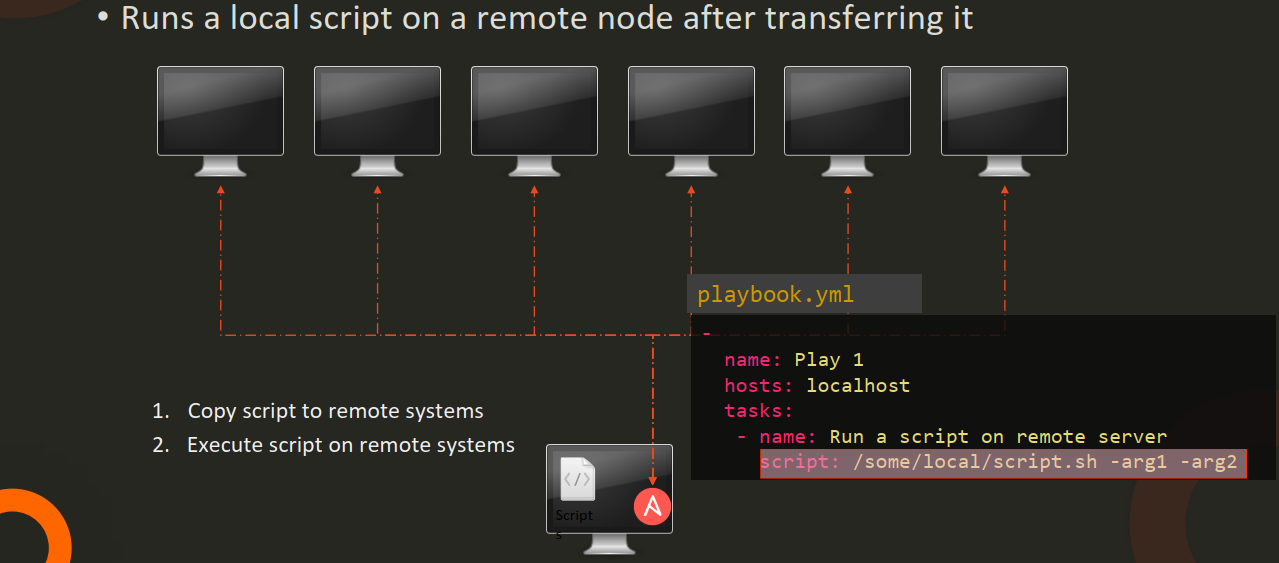

Another module to look at is the `script` module.
* The `script` module executes a script, which is located locally on the Ansible controller machine on one or more remote nodes, after transferring it over.
* To run a script on one or hundreds of servers, you really don't have to copy it over to all the servers.
* Ansible takes care of automatically copying the script to the remote node and then executing it on the remote systems.
* This is done through a very simple **play** as shown in the image.
* The **play** uses the `script` module and specifies the location of the script on the Ansible controller machine and the arguments.

# `service` module

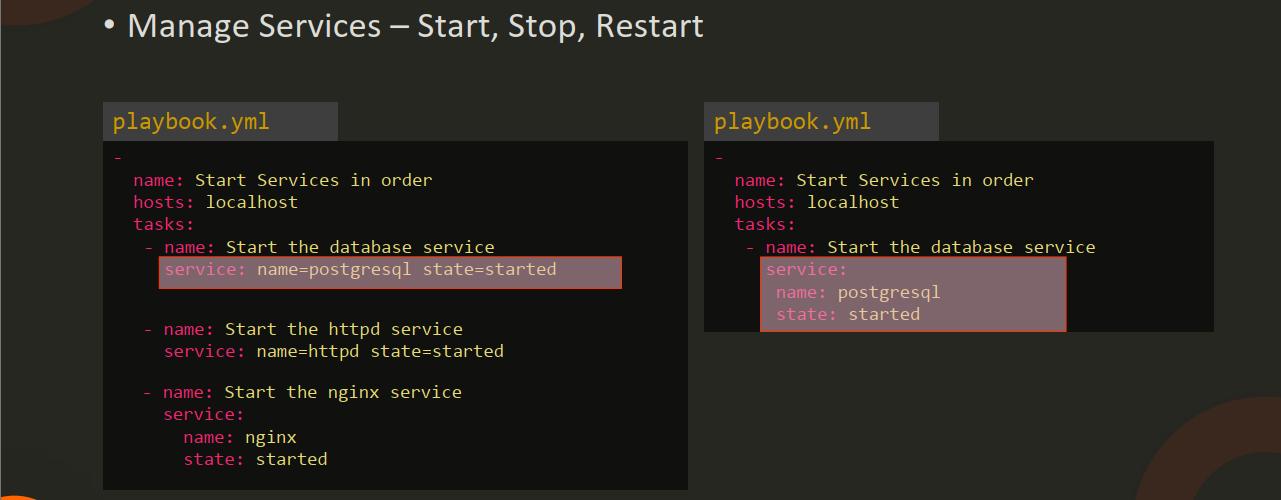

Let's look at the `service` module.
* The `service` module is used to maintain services on a system, such as starting, stopping, or restarting a service.
* This Ansible playbook is used to start various services in a particular order.
* First, we **start the database service**, using the `service` module.
* Then the `service` module **does not have a freeform input**, which means you have to pass input in a key-value pair format.
* We use the `name` parameter to specify the name of the service we wish to start, in this case, **postgresql**
* The `state` parameter indicates the operation we would like to perform, in this case, **started**.
* Now, if you're wondering why it is **started**, instead of **start**, well, hold onto your thoughts and we will come back to that in a bit.

Now, there are two ways of writing this statement:
* You can either write it as a single statement, like - `service: name=postgresql state=started`
* Or write it in a dictionary or map format as shown in the image.
* They're the same.
* Remember, in YAML terms, `name` and `state` are **properties** of the service.

Let's add a few more tasks to **start**, the `httpd` service, followed by the `nginx` service.


# Concept of Idempotency

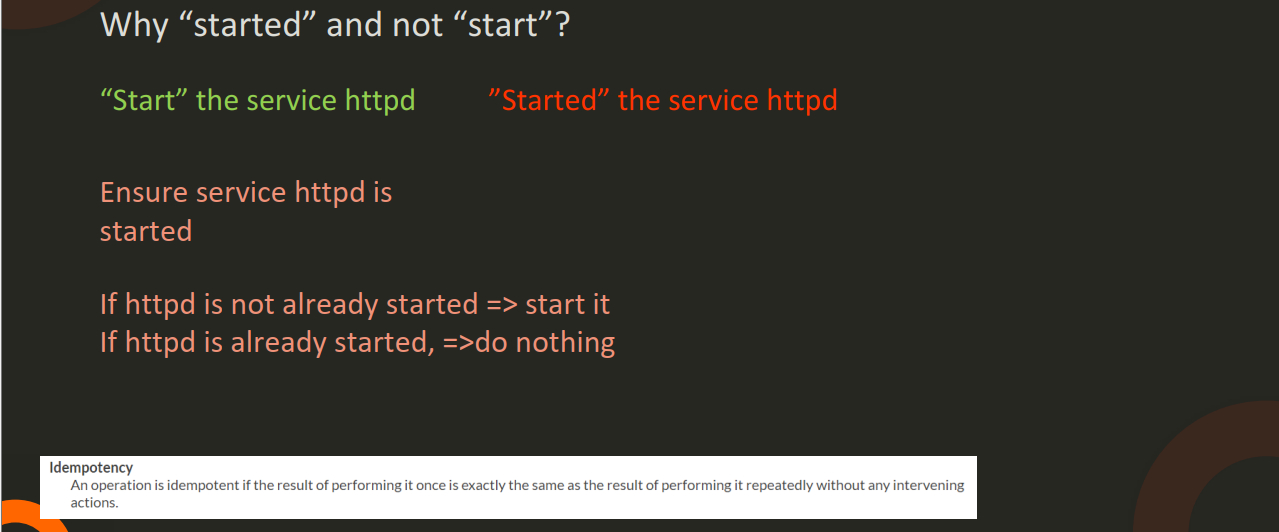

So, back to our question on **why the action is called `started` and not `start`?**
* If we were to instruct Ansible to **start a service**, we would say **`start` the service `httpd`** instead of **`started` the service `httpd`**.
* So then why is it called `started` and not `start`?
* Because we're not instructing Ansible to **start** the service.
* Instead, we are instructing Ansible to ensure that the service `httpd` is **started**.
* That essentially means if the `httpd` service is not already **started**, **start it**.
* If the `httpd` service is already **started**, then don't do anything.
* This is called **idempotency**.

As per the Ansible documentation:
* An operation is **idempotent** if the result of performing it once is exactly the same as the result of performing it repeatedly without any intervening actions.
* Thus, **started**, **stopped**, and **restarted** actions, instruct Ansible to ensure the service is in a particular state.

The majority of the modules in Ansible are **idempotent**, and Ansible highly recommends this.
* The overall idea is that you should be able to run the same playbook again, and Ansible should report that everything is in the expected state.
* If something is not, Ansible takes care of putting it in the expected state.

# `lineinfile` module

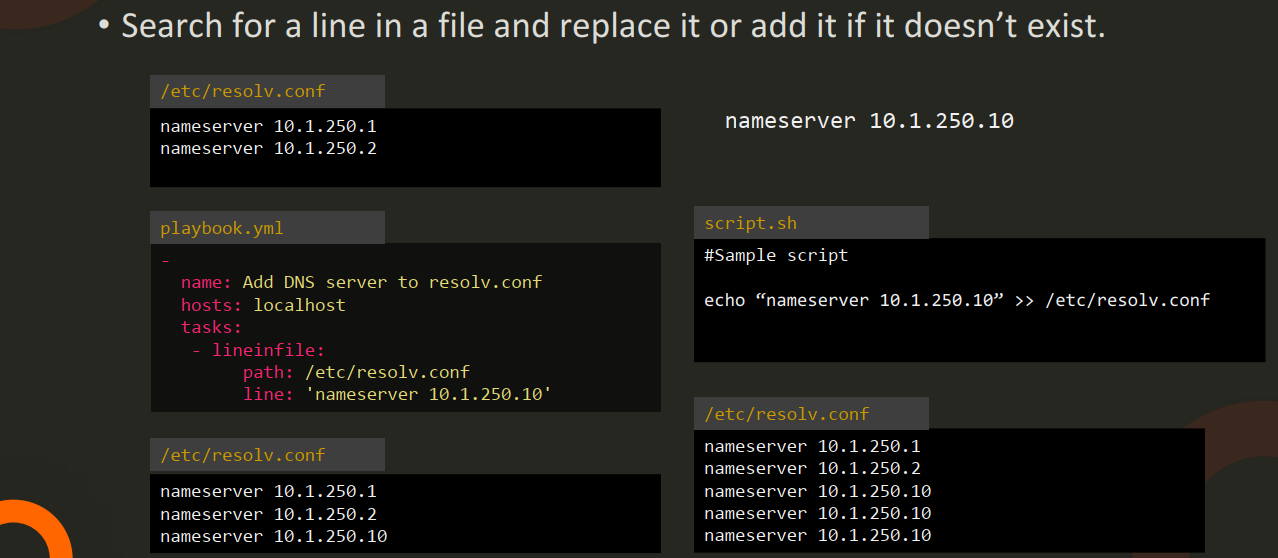

The `lineinfile` module is used to find a line in a file and replace it or ***add it, if it doesn't already exist***.
* For example, we're given a task to add a new DNS server to the `/etc/resolv.conf` file.
* This simple Ansible playbook using the `lineinfile` task **adds the new name server information** into the `/etc/resolv.conf` file.

Remember, the `lineinfile` module is **idempotent**.

Let's compare this Ansible playbook with a simple script called `script.sh` that tries to achieve the same results.
* If the script is run multiple times, it **adds a new entry into the file each time**, which is not desired.
* If you run the Ansible playbook multiple times, it will **ensure there's only a single entry in the file**.